In [1]:
from dp4gp.utils import dp_normalise, dp_unnormalise
from dp4gp import datasets
from sklearn.model_selection import KFold
import dask_dp4gp
import numpy as np
import os


selection_epsilon = 1.0
epsilon = 1.0
delta = 0.01


####Set up data and parameter search grid
kung = datasets.load_kung()
sensitivity = 100.0
y,ac_sens,norm_params = dp_normalise(kung[kung[:,3]==0,0:1],sensitivity)
X = kung[kung[:,3]==0,1:2]

#for ls in 5.0**np.linspace(0,4,3):#7
#    p_grid["lengthscale"].append(ls)
#for v in 5.0**np.linspace(0.0,18.0,5):#10
#    p_grid["variance"].append(v)
#for nv in 5.0**np.linspace(-3,1,3):#5
#    p_grid["noisevariance"].append(nv)    

p_grid = {"lengthscale":[], 'variance':[], 'noisevariance':[]}
for ls in 5.0**np.linspace(0.0,4.0,5):
    p_grid["lengthscale"].append(ls)
for v in 5.0**np.linspace(0,3,4):
    p_grid["variance"].append(v)
for nv in 5.0**np.linspace(-1,2,4):
    p_grid["noisevariance"].append(nv)    


kf = KFold(n_splits=2)
probabilities = []
allscores = []
inducing = None
for threshold_sensitivity in [1]:
    print("=======================================================")
    print("THRESHOLD SENSITIVITY")
    print(threshold_sensitivity)
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        probabilities_train,allscores_train,clf_sens_train,clf_sse_train,temp_sens_train, sse_sens_train  = dask_dp4gp.getprobabilities(X_train,y_train,p_grid,5,ac_sens,epsilon=epsilon,delta=delta,selection_epsilon=selection_epsilon,threshold_sensitivity=threshold_sensitivity,errorlimitratio=4.0)
        probabilities_test,allscores_test,clf_sens_test,clf_sse_test,temp_sens_test, sse_sens_test  = dask_dp4gp.getprobabilities(X_train,y_train,p_grid,5,ac_sens,epsilon=epsilon,delta=delta,selection_epsilon=selection_epsilon,errorlimitratio=4.0)

        print("PROBS (TRAIN,TEST)")
        print(probabilities_train,probabilities_test)
        print("SCORES")
        print(allscores_train,allscores_test)
        best_train = np.argmax(probabilities_train)
        print("BEST (TRAIN, TRAIN->TEST)")
        print(-allscores_train[best_train]/len(X_train),-allscores_test[best_train]/len(X_test))
        print("SUM PROBS(TRAIN)*-SCORES(TRAIN)")
        print(np.sum(probabilities_train*-allscores_train)/len(X_train))
        print("SUM PROBS(TRAIN)*-SCORES(TEST)")
        print(np.sum(probabilities_train*-allscores_test)/len(X_train))
        print("MEAN SCORES (TRAIN)")
        print(np.mean(-allscores_train)/len(X_train))
        print("MEAN SCORES (TEST)")
        print(np.mean(-allscores_test)/len(X_test))
        print("TEMP_SENS (TRAIN)")
        print(temp_sens_train)
        print("TEMP_SENS (TEST)")
        print(temp_sens_test)
        print("SENSITIVITY (TRAIN)")
        print(sse_sens_train)
        print("SENSITIVITY (TEST)")
        print(sse_sens_test)

THRESHOLD SENSITIVITY
1
Sensitivity made up of the sum of:
15.090735207233916
120.72588165787133
37.3689807900645
Sensitivity made up of the sum of:
15.090735207233916
120.72588165787133
11839.313369780948
PROBS (TRAIN,TEST)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00278862 0.         0.         0.
 0.01514791 0.00183743 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01322604 0.         0.         0.         0.02097333 0.01246938
 0.         0.         0.01959236 0.         0.         0.
 0.02116402 0.02040868 0.         0.         0.02475652 0.02369674
 0.01886321 0.         0.02316314 0.02506728 0.02397889 0.02002259
 0.02533902 0.02500134 0.02524304 0.02386349 0.02439305 0.02521404
 0.02519898 0.02474392 0.01986628 0.02425632 0.02540311 0.02530868
 0.01710092 0.01980678 0.02437619 0.02536623 0.0201986  0.02468141
 0.02575617 0.02556604 0.0171257  0.02018913 0.02475074 0.02572995
 0.01635339

Sensitivity made up of the sum of:
15.090735207233916
120.72588165787133
30.20884503324782
Sensitivity made up of the sum of:
15.090735207233916
120.72588165787133
8381.962362064281
PROBS (TRAIN,TEST)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01900057 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01308705 0.         0.         0.         0.0221629  0.01224895
 0.         0.         0.0151157  0.         0.         0.
 0.01998146 0.01810423 0.         0.         0.02309915 0.02104119
 0.01765164 0.         0.02439285 0.02331836 0.02051087 0.01795061
 0.02329046 0.0222507  0.02190655 0.02113723 0.02363774 0.02334253
 0.02223368 0.02253851 0.02260968 0.02357752 0.0229691  0.02278048
 0.02252982 0.02267996 0.02354357 0.02322363 0.02303946 0.02419346
 0.02318508 0.02247151 0.02241547 0.02307497 0.02420555 0.02310077
 0.02236103 0.02246959 0.02301258 0

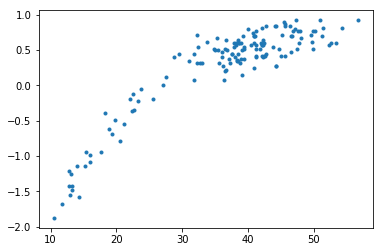

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,y_train,'.')

PROBS
[4.96166171e-04 1.13249232e-01 3.78181427e-01 5.08073175e-01]
SCORES
[-5818.0539936  -1280.66263656  -299.16530255   -99.27198396]
SUM PROBS*-SCORES
1.085355312567357
MEAN SCORES
6.530621878640797

In [ ]:
import matplotlib.pyplot as plt
import GPy
%matplotlib inline
plt.plot(X,y,'.')
k = GPy.kern.RBF(1)
m = GPy.models.GPRegression(X,y,k)
#m.kern.variance.fix(10000)# = 100.0
m.kern.lengthscale.fix(5**4)
m.optimize()
m.plot()
print(m)

In [5]:
print("\\begin{table}\n\\begin{center}\n\\begin{tabular}{ c c c c }\n")
print("Lengthscale & Noise variance & Kernel variance & Probability & RMSE \\\\ \n  \\hline")
for i,(param,prob,score) in enumerate(zip(clf_sse_train.cv_results_['params'],probabilities_train,allscores_test)):
    if i == best_train:
        a=" *"
    else:
        a = ""
    print("%0.1f & %0.1f & %0.1f & %0.4f & %0.2f %s\\\\" % (param['lengthscale'],param['noisevariance'],param['variance'],prob,norm_params['std']*np.sqrt(-score/len(X_test)),a))
print("\\end{tabular}\n\\end{center}\n\\caption{Hyperparameter search using the exponential mechanism. }\n\\end{table}")

\begin{table}
\begin{center}
\begin{tabular}{ c c c c }

Lengthscale & Noise variance & Kernel variance & Probability & RMSE \\ 
  \hline
1.0 & 0.2 & 1.0 & 0.0000 & 235.52 \\
1.0 & 0.2 & 5.0 & 0.0000 & 436.54 \\
1.0 & 0.2 & 25.0 & 0.0000 & 526.11 \\
1.0 & 0.2 & 125.0 & 0.0000 & 715.99 \\
1.0 & 1.0 & 1.0 & 0.0000 & 132.11 \\
1.0 & 1.0 & 5.0 & 0.0000 & 244.78 \\
1.0 & 1.0 & 25.0 & 0.0000 & 305.81 \\
1.0 & 1.0 & 125.0 & 0.0000 & 430.29 \\
1.0 & 5.0 & 1.0 & 0.0000 & 73.59 \\
1.0 & 5.0 & 5.0 & 0.0000 & 162.80 \\
1.0 & 5.0 & 25.0 & 0.0000 & 219.82 \\
1.0 & 5.0 & 125.0 & 0.0000 & 283.01 \\
1.0 & 25.0 & 1.0 & 0.0190 & 25.61 \\
1.0 & 25.0 & 5.0 & 0.0000 & 60.73 \\
1.0 & 25.0 & 25.0 & 0.0000 & 215.35 \\
1.0 & 25.0 & 125.0 & 0.0000 & 248.26 \\
5.0 & 0.2 & 1.0 & 0.0000 & 75.13 \\
5.0 & 0.2 & 5.0 & 0.0000 & 94.60 \\
5.0 & 0.2 & 25.0 & 0.0000 & 128.16 \\
5.0 & 0.2 & 125.0 & 0.0000 & 233.28 \\
5.0 & 1.0 & 1.0 & 0.0000 & 52.59 \\
5.0 & 1.0 & 5.0 & 0.0000 & 80.72 \\
5.0 & 1.0 & 25.0 & 0.0000 & 95.11 \\

In [6]:
i

79

In [8]:
print("BEST (TRAIN, TRAIN->TEST)")
print(norm_params['std']*np.sqrt(-allscores_train[best_train]/len(X_train)),norm_params['std']*np.sqrt(-allscores_test[best_train]/len(X_test)))
print("SUM PROBS(TRAIN)*-SCORES(TRAIN)")
print(norm_params['std']*np.sqrt(np.sum(probabilities_train*-allscores_train)/len(X_train)))
print("SUM PROBS(TRAIN)*-SCORES(TEST)")
print(norm_params['std']*np.sqrt(np.sum(probabilities_train*-allscores_test)/len(X_test)))
print("MEAN TEST SCORES")
print(norm_params['std']*np.sqrt(np.mean(-allscores_test)/len(X_test)))

BEST (TRAIN, TRAIN->TEST)
14.792292897307496 14.551223257280054
SUM PROBS(TRAIN)*-SCORES(TRAIN)
19.327363925856304
SUM PROBS(TRAIN)*-SCORES(TEST)
19.023214784418712
MEAN TEST SCORES
153.80626249376118


In [13]:
0.8*len(X)/2

114.80000000000001

In [ ]:
clf_sse.best_estimator_.get_params()

In [ ]:

clf_sse.best_estimator_.dpgp.model.kern.lengthscale = 1
clf_sse.best_estimator_.dpgp.plot()
plt.ylim([-1.5,1.5])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
clf_sse.best_estimator_.dpgp.plot()
plt.ylim([-1.5,1.5])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import GPy
from dp4gp import dp4gp

ac_sens = 2.0
#X = 1.0*np.arange(0,40)[:,None]
#X+=np.random.randn(X.shape[0])[:,None]*1e-4
#X = np.c_[X,X]
#y = np.sin(X[:,0:1])+np.random.randn(40,1)

kern = GPy.kern.RBF(1)
kern.lengthscale=8
model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model.Gaussian_noise = 1.0
kern.variance = 1.0
dpgp = dp4gp.DPGP_cloaking(model,ac_sens,epsilon,delta)
dpgp.plot()
plt.ylim([-1.5,1.5])

In [ ]:
import dp4gp

In [ ]:
import GPy
GPy.models.SparseGPRegression(np.arange(0,10)[:,None],np.arange(0,10)[:,None])

What is the trade off for:

 - size of x-validation vs sensitivity
 - ratio of epsilon used

In [ ]:
X.shape

In [ ]:
X = np.arange(0,6)[:,None]
y = np.sin(X/10) #np.ones([10,1])

In [ ]:
plt.plot(X,y,'.')

In [ ]:
m = GPy.models.GPRegression(X,y)
m.optimize()
m

In [ ]:
epsilon = 1.0
delta = 0.01


cv = 4
p_grid = {"lengthscale":[], 'variance':[], 'noisevariance':[]}
for ls in 5.0**np.linspace(2,4,2):
    p_grid["lengthscale"].append(ls)
for v in 5.0**np.linspace(-1,3,2):
    p_grid["variance"].append(v)
for nv in 5.0**np.linspace(0,2,2):
    p_grid["noisevariance"].append(nv)

kf = KFold(n_splits=cv,shuffle=True,random_state=1)
kern = GPy.kern.RBF(1)
param_probabilities,temp_sens,sse_sens,temp_scores,scores,params,clf = dask_dp4gp.getprobabilities(X,y,p_grid,kf,ac_sens,kern=kern)

print("PARAM PROBS")
print(param_probabilities)
print("ALL SENSITIVITIES")
print(temp_sens)
print("SENS")
print(sse_sens)
print("ALL SCORES")
print(temp_scores)
print("SCORES")
print(scores)

In [ ]:
debug

In [ ]:
current = None
res = []
currentres = -np.inf
for s,p,prob in zip(scores,params,param_probabilities):
    if p['lengthscale']!=current:
        res.append(currentres)
        currentres = -np.inf
        current = p['lengthscale']
    currentres=max(currentres,s)
    
res